In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

In [21]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata 
print(breast_cancer_wisconsin_original.metadata)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [4]:
# variable information 
print(breast_cancer_wisconsin_original.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

# Data preprocessing

In [5]:
X.Bare_nuclei.agg(['mean', 'median', 'std', 'max', 'min'])

mean       3.544656
median     1.000000
std        3.643857
max       10.000000
min        1.000000
Name: Bare_nuclei, dtype: float64

<Axes: xlabel='Bare_nuclei'>

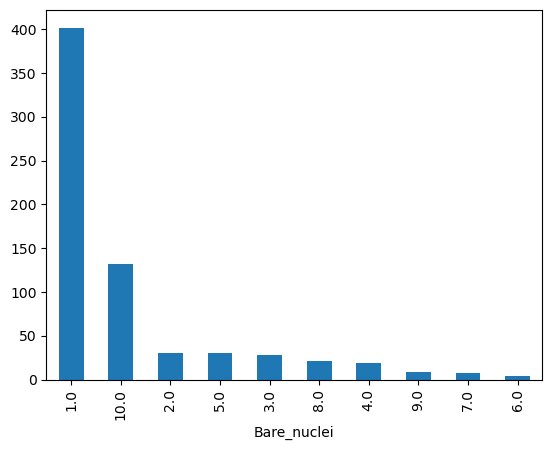

In [6]:
X.Bare_nuclei.value_counts().plot(kind='bar')

## Filling missing value with mode of the attribute

In [22]:
flags = (X['Bare_nuclei'].isna())
X.loc[flags, 'Bare_nuclei'] = 1

## Define normalization function for the data

In [23]:
# นิยามฟังก์ชันที่เองชื่อ normalize
def normalize(col):
    # ตัวแปรชื่อ col ที่รับมาจาก apply จะเป็นเพียงคอลัมน์ ๆ หนึ่งของ X_train
    return (col - col.mean())/col.std(ddof=0) # Standardization

# Split test and train data

In [24]:
labels = y['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)
X_train.count(), X_test.count()

(Clump_thickness                419
 Uniformity_of_cell_size        419
 Uniformity_of_cell_shape       419
 Marginal_adhesion              419
 Single_epithelial_cell_size    419
 Bare_nuclei                    419
 Bland_chromatin                419
 Normal_nucleoli                419
 Mitoses                        419
 dtype: int64,
 Clump_thickness                280
 Uniformity_of_cell_size        280
 Uniformity_of_cell_shape       280
 Marginal_adhesion              280
 Single_epithelial_cell_size    280
 Bare_nuclei                    280
 Bland_chromatin                280
 Normal_nucleoli                280
 Mitoses                        280
 dtype: int64)

## Before normalization

In [10]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## After normalization

In [42]:
new_X_train = X_train.apply(normalize)

import random
new_X_train['bias'] = random.uniform(-1,1)
new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,bias
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,0.133196
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.785449,2.736402,-0.614245,-0.349261,0.133196
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.699026,-0.571358,-0.614245,-0.349261,0.133196
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.984828,-0.614245,-0.349261,0.133196
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.699026,-0.571358,-0.614245,-0.349261,0.133196
...,...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,0.133196
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,0.133196
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.405185,1.495992,0.353306,0.901511,0.133196
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.405185,-0.571358,-0.614245,0.276125,0.133196


# Build and define neural network

In [43]:
# print(new_X_train.iloc[0])
# len(new_X_train.iloc[0])
import random
W4=[ random.uniform(-1,1) for _ in range(len(new_X_train.iloc[0])+1)]
W4

[0.4840340217515251,
 0.12027845062509468,
 -0.05404639040119208,
 0.010438330402243734,
 -0.6870479175996156,
 0.6225360253288028,
 0.05990939412743046,
 -0.8259595359814587,
 -0.33419595425558635,
 -0.35388190416057475,
 0.2118951477205797]

In [44]:
new_X_train.iloc[0][8]

-0.34926073374496597

In [45]:
y.iloc[0][0]

2

## Work for one instance now has to implement more so that it can loop for entire dataset

In [63]:
from NNfunctions import * # ถ้า import * คือเอาทุก function ในไฟล์ NNfunction
import random

E = []
iterations = []
X=new_X_train.iloc[0] # input X

W10=[ random.uniform(-1,1) for _ in range(len(new_X_train.iloc[0])) ] #weight ที่เกี่ยวข้องกับ node 10 [w1_10,w2_10,w3_10,w4_10,w5_10,w6_10,w7_10,w8_10,w9_10,bias10]
W11=[  random.uniform(-1,1) for _ in range(len(new_X_train.iloc[0]))  ] #weight ที่เกี่ยวข้องกับ node 11

b12n = 1 # init input bias for node 12
W12=([ random.uniform(-1,1) for _ in range(3) ])

d12=y.iloc[0][0] #desire output

l=-0.9 # learning rate

count = 1
e = 1

while (e >= 0.01) and (count < 1000):
    print("\n-----Forward pass-----> ")
    o10=Nout(X, W10) #call NNfunction
    y10=sigmoid(o10) #call NNfunction
    print("\nSum(V) of node 10 is: %8.3f, Y from node 10 is: %8.3f" % (o10,y10))

    o11=Nout(X, W11)
    y11=sigmoid(o11)
    #คำนวน y11
    #print ผลลัพธ์
    print("\nSum(V) of node 11 is: %8.3f, Y from node 11 is: %8.3f" % (o11,y11))

    X12 = ([y10, y11, 1])
    o12 = Nout(X12, W12)
    y12 = sigmoid(o12)
    print("\nSum(V) of node 12 is: %8.3f, Y from node 12 is: %8.3f" % (o12,y12))
    #backpropagation
    #node 12

    print(f"\n<---- Round:{count} ---->")
    iterations.append(count)
    count += 1
    print("\n<---- Back propagation & calculate new Weights and Biases ----")
    
    # if y12 >= 0.5:
    #     y12 = 2
    # else:
    #     y12 = 4
    e = d12-y12
    print(f"\n<---- loss: {e:.3f}")
    E.append(e)
    
    g12 = gradOut(e, y12) #call NNfunction

    dw10_12 = deltaWeight(l, g12, y10) #call NNfunction
    w10_12n = W12[0]+dw10_12
    dw11_12 = deltaWeight(l, g12, y11)
    w11_12n = W12[1]+dw11_12
    db12 = deltaWeight(l, g12, W12[2])
    b12n = W12[2]+db12

    # Update weight & bias
    W12 = [w10_12n, w11_12n, b12n]
    print("\nNew w10_12 is %8.3f, New w11_12 is:%8.3f, New bias 12 is %8.3f"% (w10_12n, w11_12n, b12n))

    #node10
    #pre gradient10=g12*w10_12
    sumN10w = g12 * (W12[0])
    g10 = gradHidden(y12, sumN10w)
    dw1_10 = deltaWeight(l, g10, new_X_train.iloc[0][0])
    w1_10n = W10[0]+dw1_10
    dw2_10 = deltaWeight(l, g10, new_X_train.iloc[0][1])
    w2_10n = W10[1]+dw2_10
    dw3_10 = deltaWeight(l, g10, new_X_train.iloc[0][2])
    w3_10n = W10[2]+dw3_10
    dw4_10 = deltaWeight(l, g10, new_X_train.iloc[0][3])
    w4_10n = W10[3]+dw4_10
    dw5_10 = deltaWeight(l, g10, new_X_train.iloc[0][4])
    w5_10n = W10[4]+dw5_10
    dw6_10 = deltaWeight(l, g10, new_X_train.iloc[0][5])
    w6_10n = W10[5]+dw6_10
    dw7_10 = deltaWeight(l, g10, new_X_train.iloc[0][6])
    w7_10n =W10[6]+dw7_10
    dw8_10 = deltaWeight(l, g10, new_X_train.iloc[0][7])
    w8_10n = W10[7]+dw8_10
    dw9_10 = deltaWeight(l, g10, new_X_train.iloc[0][8])
    w9_10n = W10[8]+dw9_10
    
    db10 = deltaWeight(l, g10, W10[9])
    b10n = W10[9]+db10

    # # Update weight & bias
    W10 = [w1_10n, w2_10n, w3_10n, w4_10n, w5_10n, w6_10n, w7_10n, w8_10n, w9_10n, b10n]
    print("\nNew w1_10 is %8.3f, New w2_10 is:%8.3f, New w3_10 is:%8.3f, New w4_10 is:%8.3f, New w5_10 is:%8.3f, New w6_10 is:%8.3f, New w7_10 is:%8.3f, New w8_10 is:%8.3f, New w9_10 is:%8.3f, New bias 10 is %8.3f"% (w1_10n, w2_10n, w3_10n, w4_10n, w5_10n, w6_10n, w7_10n, w8_10n, w9_10n, b10n))
    
    # #node11
    # #pre gradient11=g12*w11_12
    sumN11w = g12 * (W12[1])
    g11 = gradHidden(y11, sumN11w)
    dw1_11 = deltaWeight(l, g11, new_X_train.iloc[0][0])
    w1_11n = W11[0]+dw1_11
    dw2_11 = deltaWeight(l, g11, new_X_train.iloc[0][1])
    w2_11n = W11[1]+dw2_11
    dw3_11 = deltaWeight(l, g11, new_X_train.iloc[0][2])
    w3_11n = W11[2]+dw3_11
    dw4_11 = deltaWeight(l, g11, new_X_train.iloc[0][3])
    w4_11n = W11[3]+dw4_11
    dw5_11 = deltaWeight(l, g11, new_X_train.iloc[0][4])
    w5_11n = W11[4]+dw5_11
    dw6_11 = deltaWeight(l, g11, new_X_train.iloc[0][5])
    w6_11n = W11[5]+dw6_11
    dw7_11 = deltaWeight(l, g11, new_X_train.iloc[0][6])
    w7_11n = W11[6]+dw7_11
    dw8_11 = deltaWeight(l, g11, new_X_train.iloc[0][7])
    w8_11n = W11[7]+dw8_11
    dw9_11 = deltaWeight(l, g11, new_X_train.iloc[0][8])
    w9_11n = W11[8]+dw9_11
    
    db11 = deltaWeight(l, g11, W11[9])
    b11n = W11[9]+db11
    
    # # Update weight & bias
    W11 = [w1_11n, w2_11n, w3_11n, w4_11n, w5_11n, w6_11n, w7_11n, w8_11n, w9_11n, b11n]
    print("\nNew w1_11 is %8.3f, New w2_11 is:%8.3f, New w3_11 is:%8.3f, New w4_11 is:%8.3f, New w5_11 is:%8.3f, New w6_11 is:%8.3f, New w7_11 is:%8.3f, New w8_11 is:%8.3f, New w9_11 is:%8.3f, New bias 11 is %8.3f"% (w1_11n, w2_11n, w3_11n, w4_11n, w5_11n, w6_11n, w7_11n, w8_11n, w9_11n, b11n))


-----Forward pass-----> 

Sum(V) of node 10 is:    1.819, Y from node 10 is:    0.860

Sum(V) of node 11 is:    1.436, Y from node 11 is:    0.808

Sum(V) of node 12 is:    1.430, Y from node 12 is:    0.807

<---- Round:1 ---->

<---- Back propagation & calculate new Weights and Biases ----

<---- loss: 1.193

New w10_12 is   -0.020, New w11_12 is:   1.084, New bias 12 is    0.939

New w1_10 is    0.624, New w2_10 is:  -0.905, New w3_10 is:  -0.122, New w4_10 is:  -0.019, New w5_10 is:  -0.783, New w6_10 is:  -0.663, New w7_10 is:   0.498, New w8_10 is:  -0.028, New w9_10 is:  -0.241, New bias 10 is    0.378

New w1_11 is   -0.006, New w2_11 is:  -0.088, New w3_11 is:  -0.729, New w4_11 is:  -1.002, New w5_11 is:  -0.461, New w6_11 is:  -0.488, New w7_11 is:  -0.505, New w8_11 is:   0.666, New w9_11 is:   0.057, New bias 11 is    0.313

-----Forward pass-----> 

Sum(V) of node 10 is:    1.818, Y from node 10 is:    0.860

Sum(V) of node 11 is:    1.516, Y from node 11 is:    0.820

S

# Plotting loss

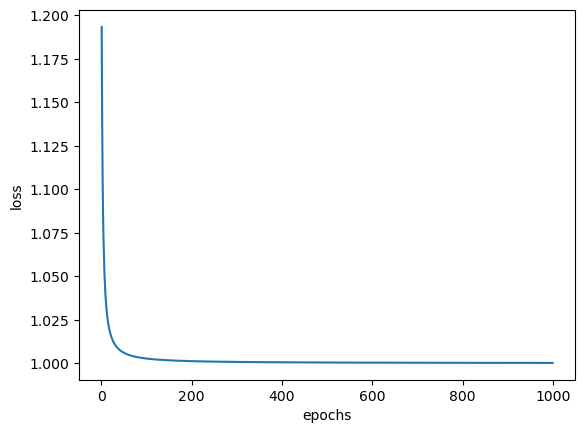

In [64]:
import matplotlib.pyplot as plt

plt.plot(iterations, E)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()